In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# Load dataset
dataset = pd.read_csv("train_dataset_final1.csv")

In [3]:
dataset.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [4]:
dataset.drop('Customer_ID', axis=1, inplace=True)

In [5]:
dataset.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marriage            25247 non-null  int64  
 1   sex                 25247 non-null  int64  
 2   education           25247 non-null  int64  
 3   LIMIT_BAL           25247 non-null  int64  
 4   age                 25121 non-null  float64
 5   pay_0               25247 non-null  int64  
 6   pay_2               25247 non-null  int64  
 7   pay_3               25247 non-null  int64  
 8   pay_4               25247 non-null  int64  
 9   pay_5               25247 non-null  int64  
 10  pay_6               25247 non-null  int64  
 11  Bill_amt1           25247 non-null  float64
 12  Bill_amt2           25247 non-null  float64
 13  Bill_amt3           25247 non-null  float64
 14  Bill_amt4           25247 non-null  float64
 15  Bill_amt5           25247 non-null  float64
 16  Bill

In [7]:
dataset.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [8]:
dataset.isnull().sum()

marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [9]:
dataset.duplicated().sum()
#No duplicate values in the dataset

803

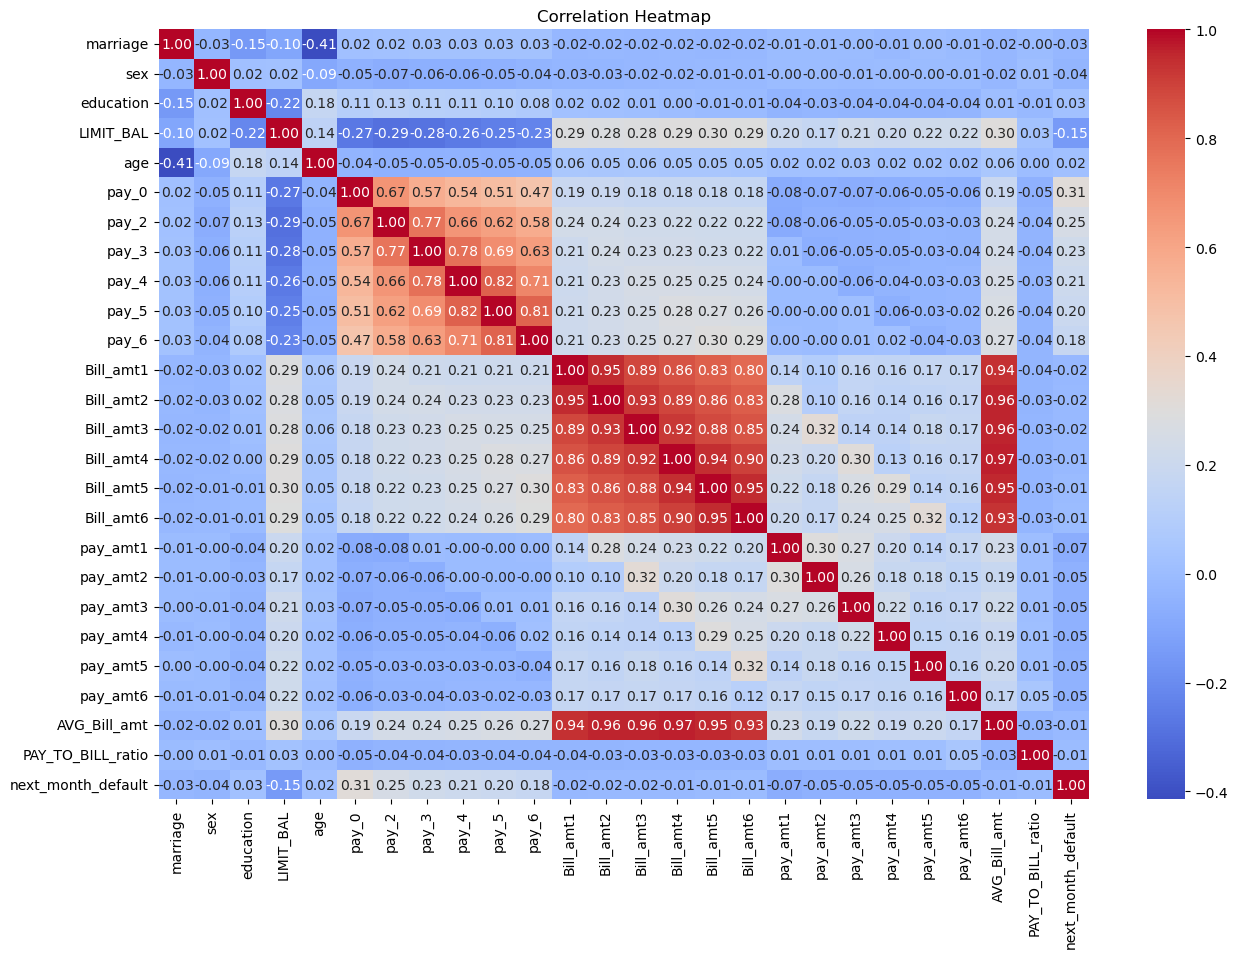

In [10]:
#HeatMapcorr_matrix = dataset.corr())
corr_matrix = dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

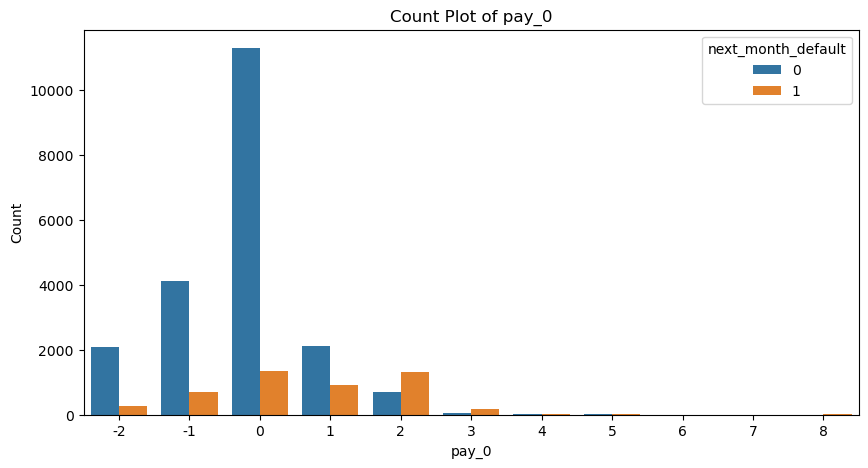

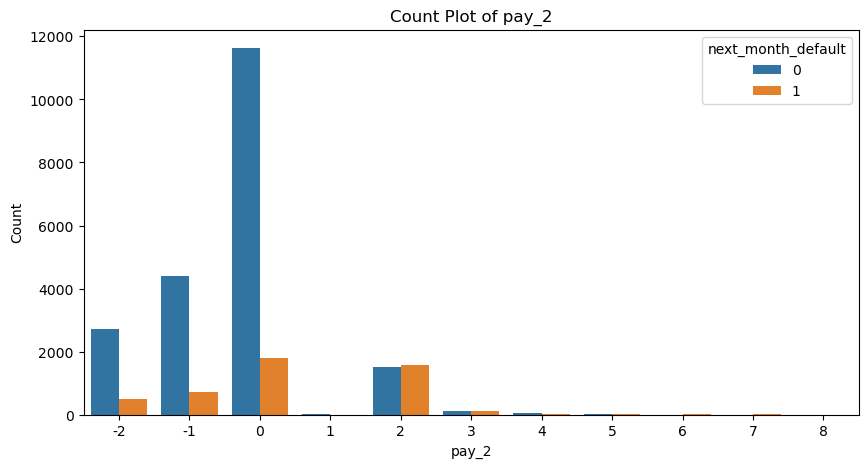

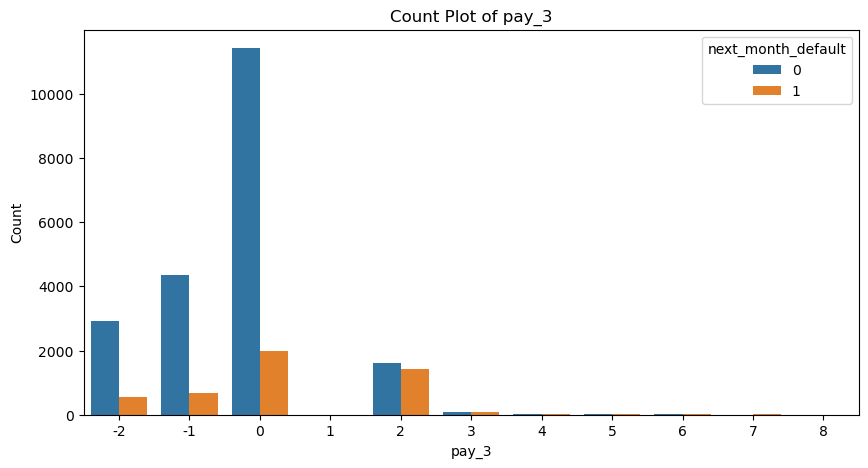

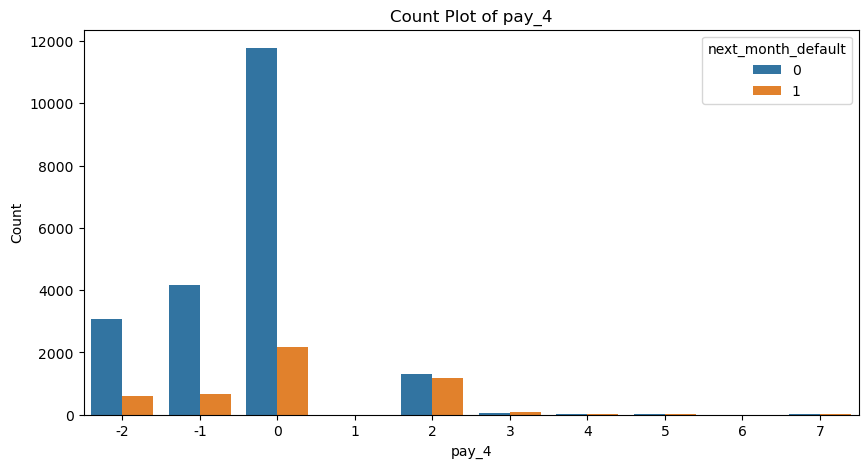

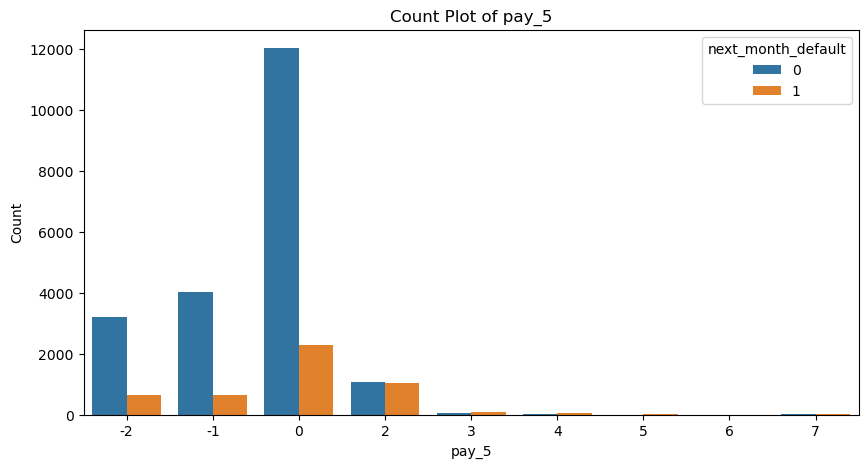

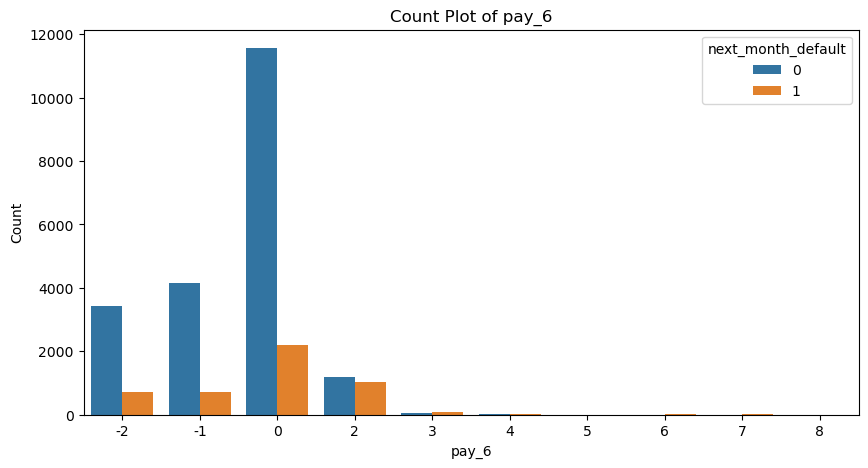

In [11]:
pay_hist_cols=["pay_0","pay_2","pay_3","pay_4","pay_5","pay_6"]
for pay_hist_col in pay_hist_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=pay_hist_col, data=dataset, hue='next_month_default')
    plt.title('Count Plot of '+pay_hist_col)
    plt.xlabel(pay_hist_col)
    plt.ylabel('Count')
    plt.show()

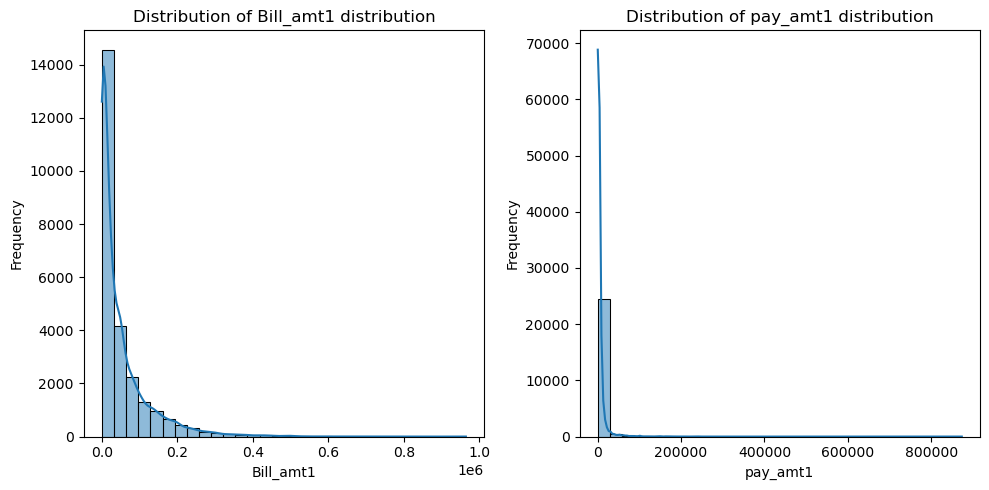

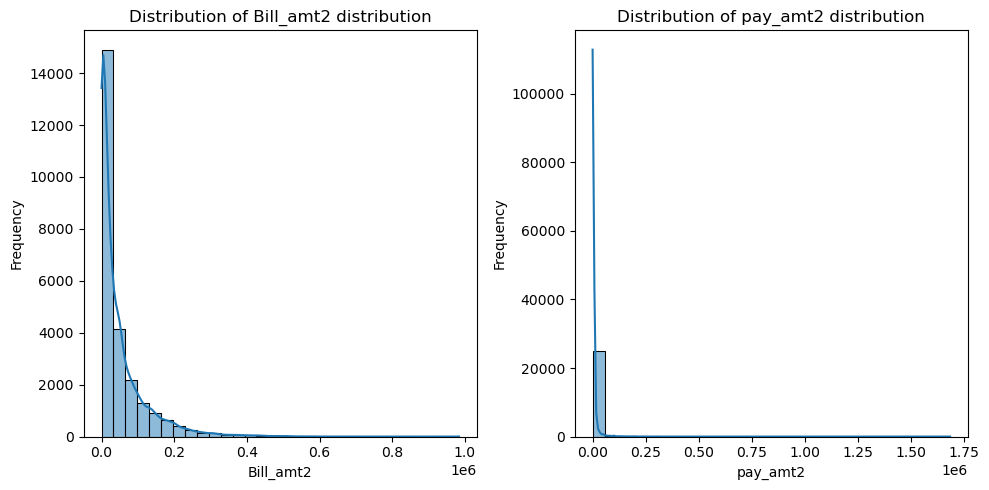

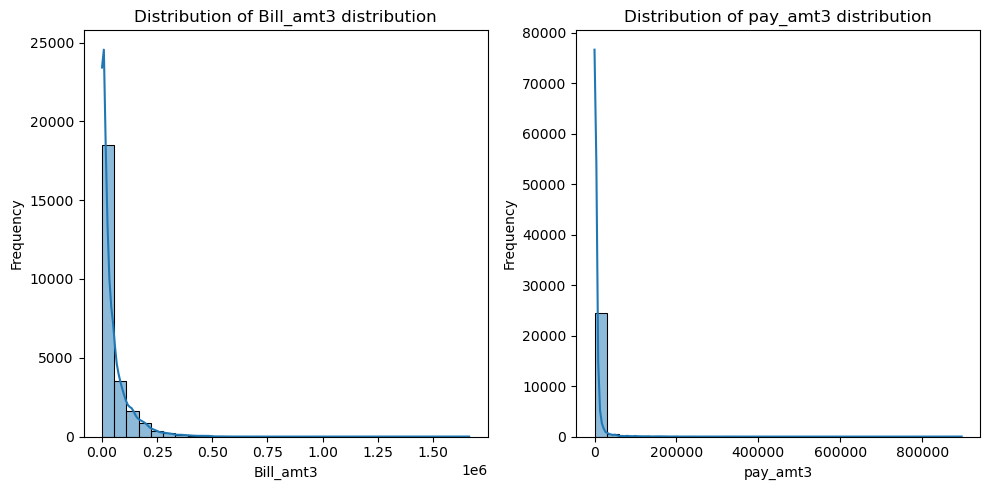

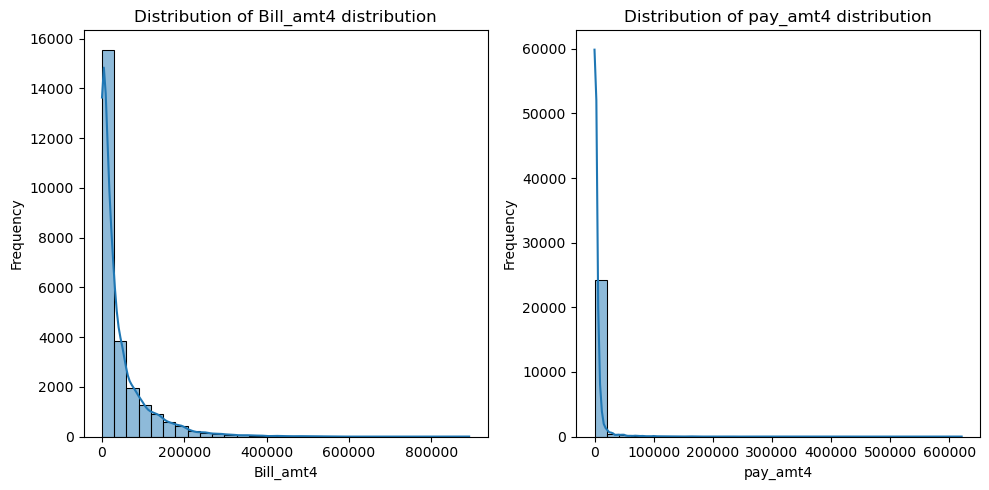

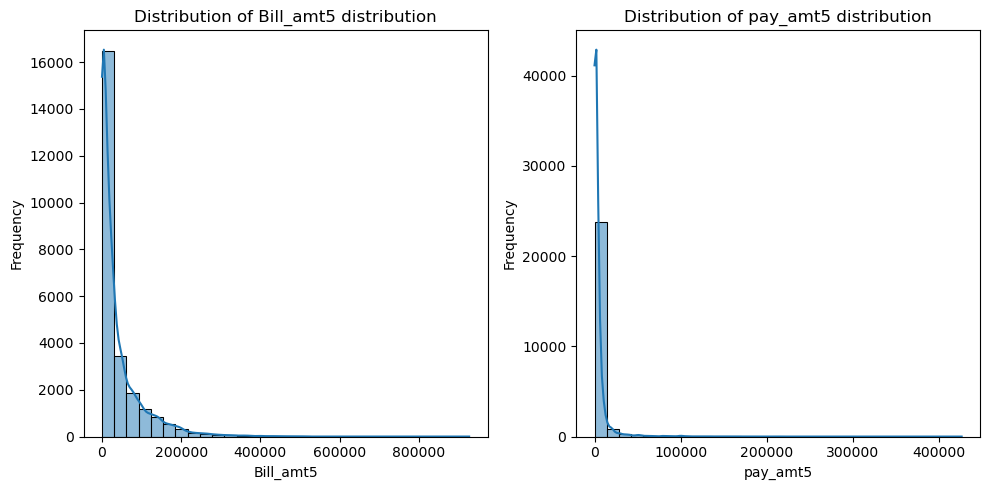

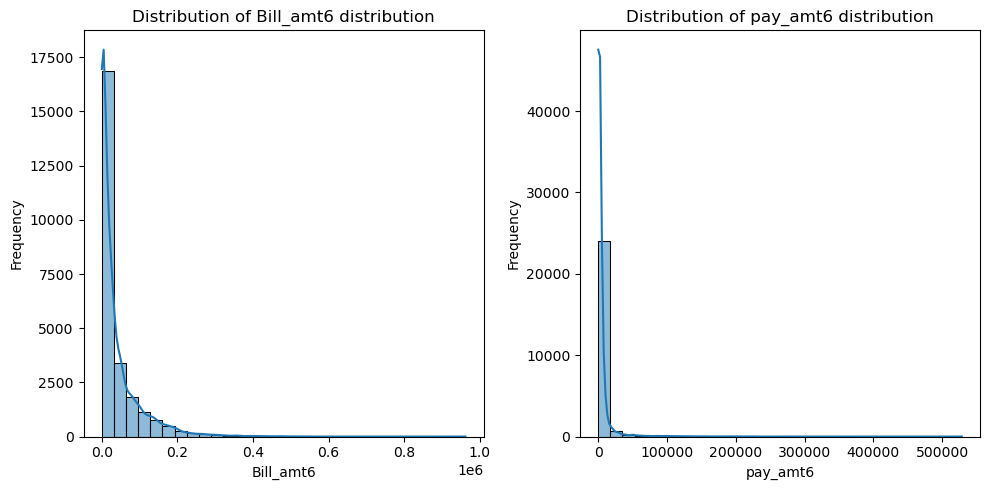

In [12]:
for i in range(1, 7):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(dataset['Bill_amt' + str(i)], bins=30, kde=True)
    plt.title('Distribution of Bill_amt' + str(i)+" distribution")
    plt.xlabel('Bill_amt' + str(i))
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(dataset['pay_amt' + str(i)], bins=30, kde=True)
    plt.title('Distribution of pay_amt' + str(i)+" distribution")
    plt.xlabel('pay_amt' + str(i))
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

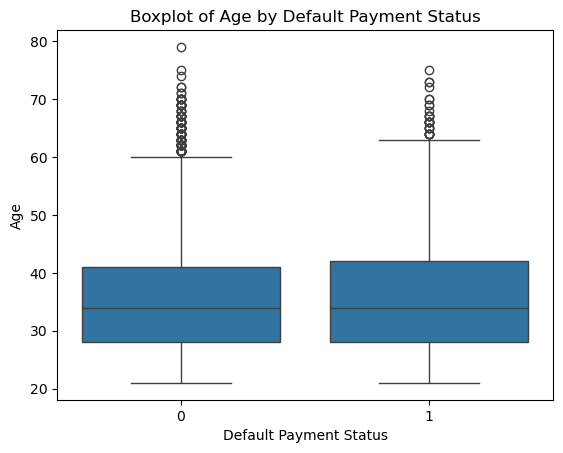

In [13]:
sns.boxplot(x='next_month_default', y='age', data=dataset)
plt.title('Boxplot of Age by Default Payment Status')
plt.xlabel('Default Payment Status')
plt.ylabel('Age')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_14224\4141317036.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['LIMIT_BAL'], bins=200, kde=True,color='blue')


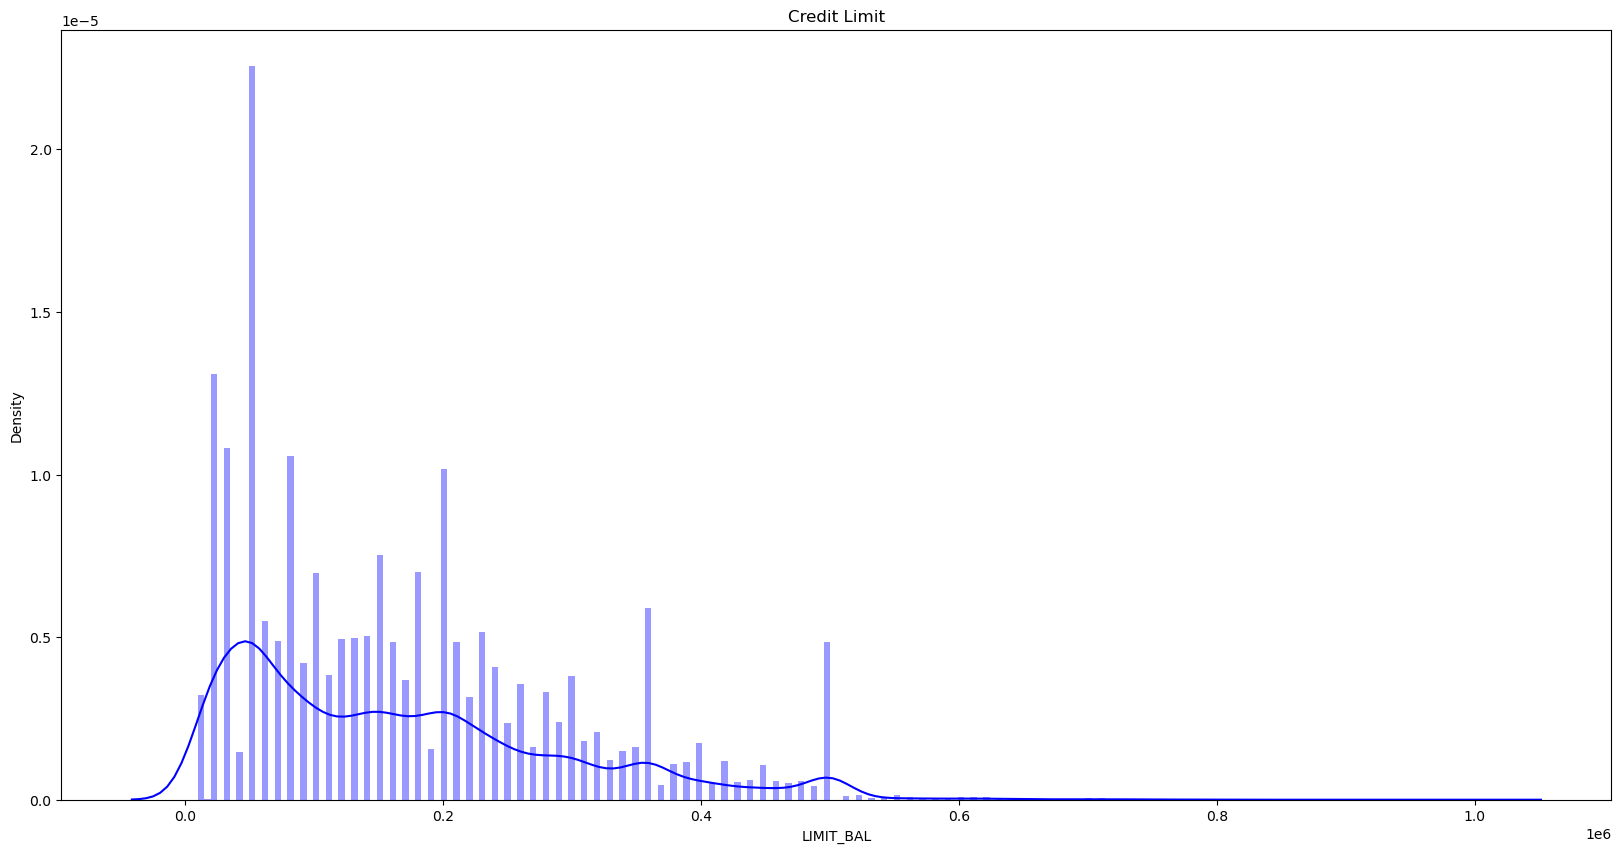

In [14]:
plt.figure(figsize=(20, 10))
plt.title('Credit Limit')
sns.distplot(dataset['LIMIT_BAL'], bins=200, kde=True,color='blue')
plt.show()

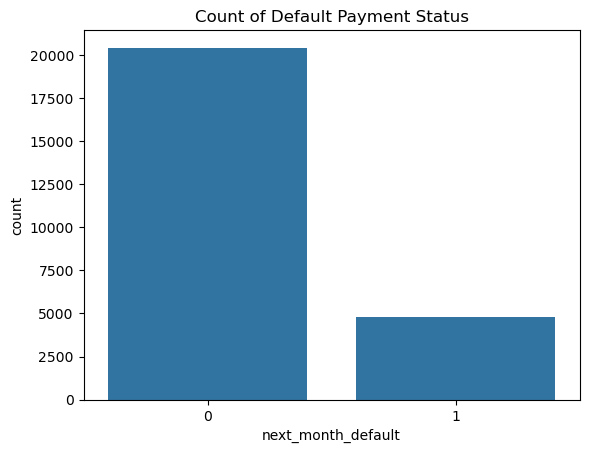

In [15]:
sns.countplot(x='next_month_default', data=dataset)
plt.title('Count of Default Payment Status')
plt.show()

In [16]:
dataset['next_month_default'].value_counts()

next_month_default
0    20440
1     4807
Name: count, dtype: int64

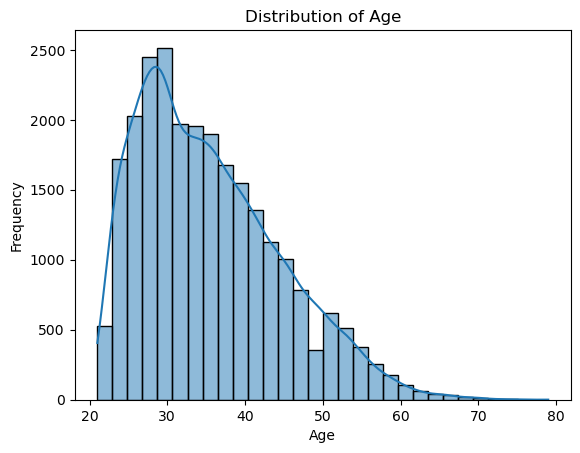

In [17]:
sns.histplot(dataset['age'],bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

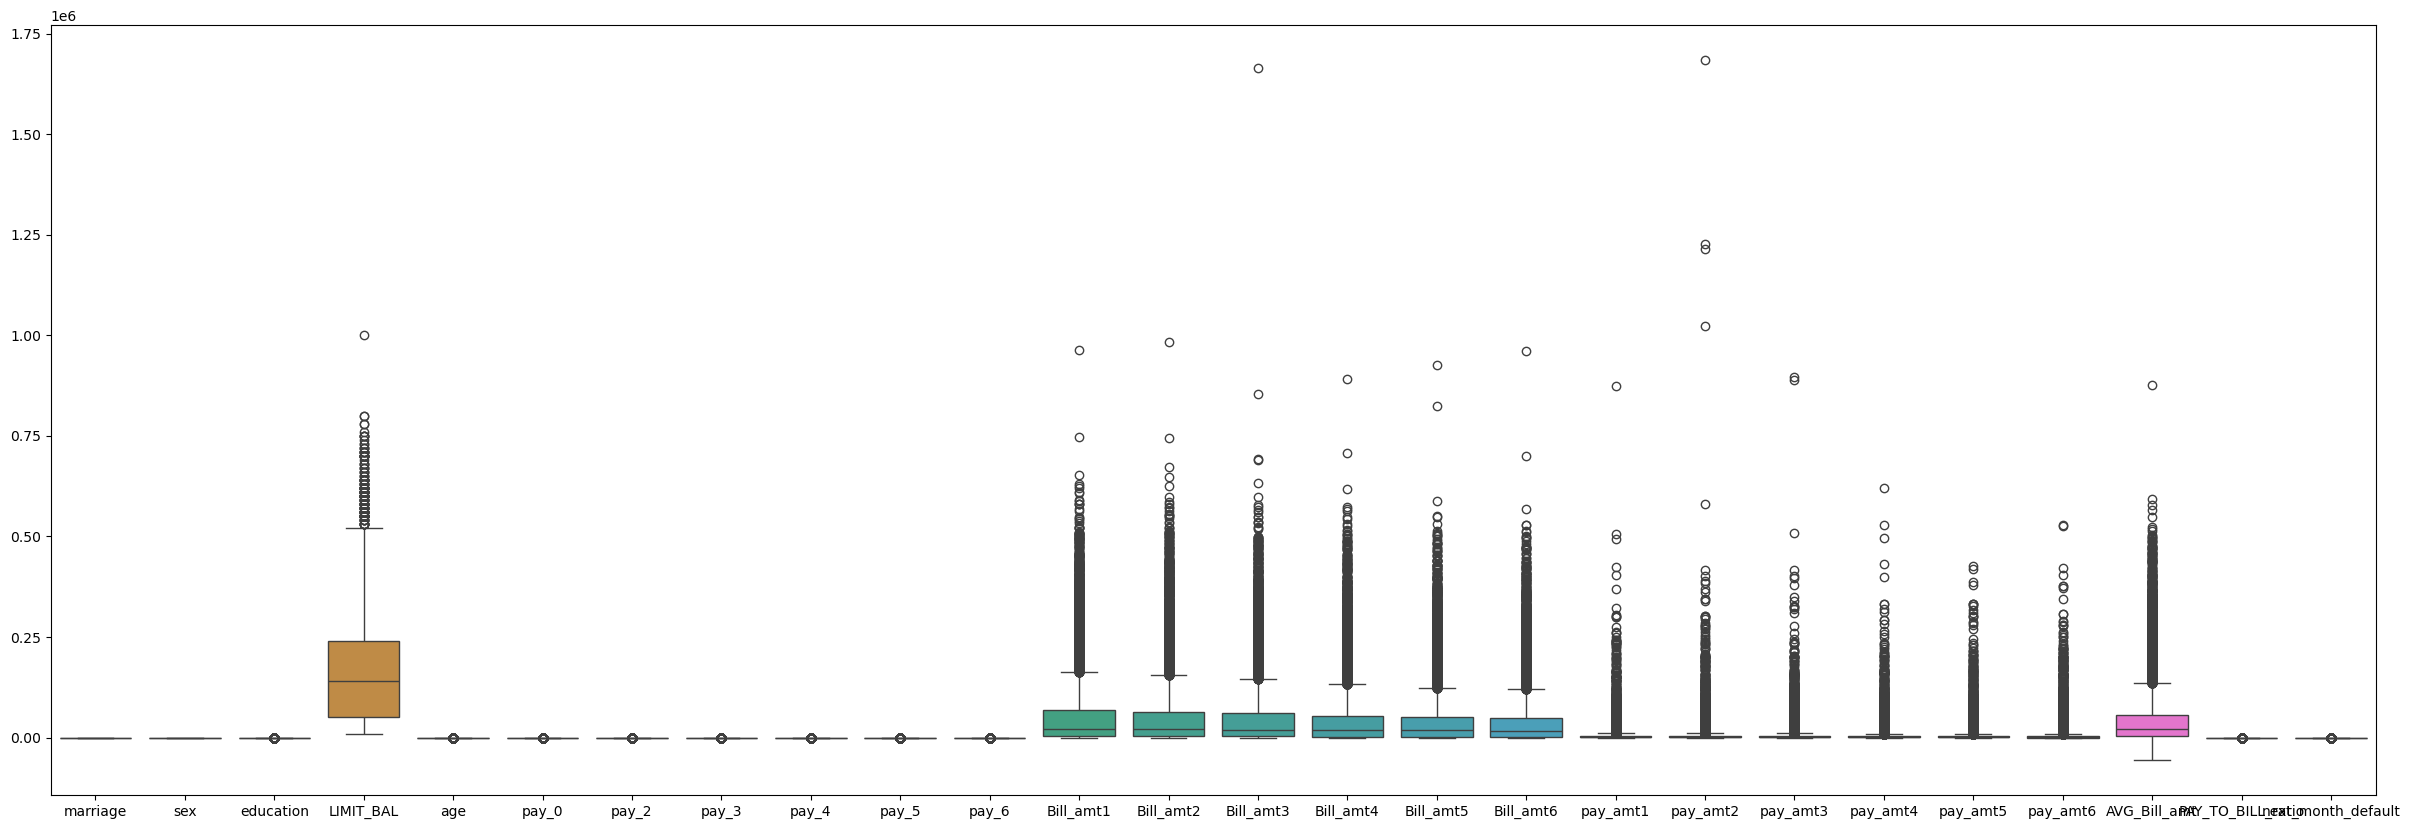

In [18]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=dataset)
plt.show()

In [19]:
dataset['age'].interpolate(method='linear', inplace=True)


C:\Users\ayush\AppData\Local\Temp\ipykernel_14224\1766360980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['age'].interpolate(method='linear', inplace=True)


In [20]:


# Define columns and corresponding weights (more recent months get more weight)
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
weights = np.array([6, 5, 4, 3, 2, 1])  # You can change this

# Compute weighted average of payment delays
dataset['payment_delay_score'] = dataset[pay_cols].dot(weights) / weights.sum()

for i in pay_cols:
    dataset.drop(i, axis=1, inplace=True)


In [21]:
# Define columns and corresponding weights (more recent months get more weight)
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
weights = np.array([6, 5, 4, 3, 2, 1])  # You can change this

# Compute weighted average of payment delays
dataset['bill_score'] = dataset[bill_cols].dot(weights) / weights.sum()

for i in bill_cols:
    dataset.drop(i, axis=1, inplace=True)


In [22]:
# Define columns and corresponding weights (more recent months get more weight)
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
weights = np.array([6, 5, 4, 3, 2, 1])  # You can change this

# Compute weighted average of payment delays
dataset['payment_score'] = dataset[pay_amt_cols].dot(weights) / weights.sum()

for i in pay_amt_cols:
    dataset.drop(i, axis=1, inplace=True)

In [23]:
dataset.head()

,marriage,sex,education,LIMIT_BAL,age,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,payment_delay_score,bill_score,payment_score
0,2,0,2,60000,25.0,41511.50,0.03,0,1.428571,49638.806667,1262.204762
1,2,1,1,290000,24.0,2534.50,0.27,0,-0.761905,3509.700476,450.041429
2,1,0,2,180000,63.0,50422.00,0.04,0,0.000000,49589.318095,2035.764762
3,1,1,2,210000,43.0,86229.50,0.04,0,0.000000,88941.406667,3191.751429
4,2,0,1,280000,32.0,11814.33,0.72,0,-2.000000,13082.754762,9921.033810


In [24]:


# Load your CSV data
X = dataset.drop('next_month_default', axis=1)
y = dataset['next_month_default']
# X = features, y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(y_train.value_counts())

smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())


next_month_default
0    16369
1     3828
Name: count, dtype: int64
next_month_default
1    16369
0    16369
Name: count, dtype: int64


In [28]:
def objective(trial):
    # Define search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'eval_metric': 'logloss',
        'random_state': 42
    }

    model = XGBClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best params
print("Best trial:")
print("  Value: ", study.best_value)
print("  Params: ")
for key, value in study.best_params.items():
    print(f"    {key}: {value}")

# Train model with best params
best_params = study.best_params
best_params['eval_metric'] = 'logloss'
best_params['random_state'] = 42


[I 2025-06-13 21:11:20,486] A new study created in memory with name: no-name-e01dcb0a-18f5-425c-8f00-1fa37fc0658e
[I 2025-06-13 21:11:22,059] Trial 0 finished with value: 0.8165145980620386 and parameters: {'n_estimators': 115, 'max_depth': 8, 'learning_rate': 0.06318838907973676, 'subsample': 0.917922885222114, 'colsample_bytree': 0.5286882119723935, 'gamma': 0.9201471951364132, 'reg_alpha': 3.594205552110346, 'reg_lambda': 1.6547596156109523}. Best is trial 0 with value: 0.8165145980620386.
[I 2025-06-13 21:11:23,282] Trial 1 finished with value: 0.8092145117533601 and parameters: {'n_estimators': 258, 'max_depth': 10, 'learning_rate': 0.2900631900297946, 'subsample': 0.9759177064785083, 'colsample_bytree': 0.6578340238384939, 'gamma': 1.8580250406809444, 'reg_alpha': 3.3030169324075356, 'reg_lambda': 3.035868196373954}. Best is trial 0 with value: 0.8165145980620386.
[I 2025-06-13 21:11:25,466] Trial 2 finished with value: 0.8285197328260242 and parameters: {'n_estimators': 459, 'ma

Best trial:
  Value:  0.8393633858261721
  Params: 
    n_estimators: 445
    max_depth: 10
    learning_rate: 0.17473750785098613
    subsample: 0.8414842791410446
    colsample_bytree: 0.6368820422131578
    gamma: 0.10677052712571285
    reg_alpha: 0.627164453989522
    reg_lambda: 2.8382057267295075


Test Accuracy: 0.6764356435643565
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      4071
           1       0.34      0.69      0.45       979

    accuracy                           0.68      5050
   macro avg       0.62      0.68      0.61      5050
weighted avg       0.79      0.68      0.71      5050



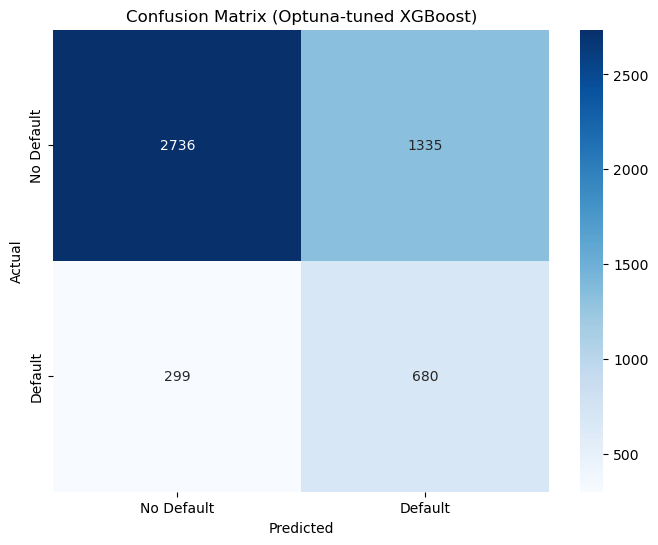

F2 Score: 0.5732591468555049


In [45]:
xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

threshold = 0.12

# Evaluate
test_probab = xgb_clf.predict_proba(X_test)[:, 1]


y_pred = (test_probab >= threshold).astype(int) 
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix (Optuna-tuned XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
f2 = fbeta_score(y_test, y_pred, beta=2)
print("F2 Score:", f2)

In [46]:
# Step 1: Load the CSV file
data = pd.read_csv("validate_dataset_final.csv")

In [47]:
new_data=data.drop('Customer_ID', axis=1)

In [48]:
weights = np.array([6, 5, 4, 3, 2, 1])
new_data['payment_delay_score'] = new_data[pay_cols].dot(weights) / weights.sum()

for i in pay_cols:
    new_data.drop(i, axis=1, inplace=True)

In [49]:
new_data['bill_score'] = new_data[bill_cols].dot(weights) / weights.sum()

for i in bill_cols:
    new_data.drop(i, axis=1, inplace=True)

In [50]:
new_data['payment_score'] = new_data[pay_amt_cols].dot(weights) / weights.sum()

for i in pay_amt_cols:
    new_data.drop(i, axis=1, inplace=True)

In [52]:
test_probab = xgb_clf.predict_proba(new_data)[:, 1]


y_pred = (test_probab >= threshold).astype(int) 


# Save predictions to CSV
predictions = pd.DataFrame({
    'Customer_ID': data['Customer_ID'],
    'next_month_default(0 or 1)': y_pred
})


predictions.to_csv("submission_23113040.csv", index=False)
print("Predictions saved to submission_23113040.csv")

Predictions saved to submission_23113040.csv
